# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
!pip install citipy

In [26]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from scipy.stats import linregress
from api_keys import weather_api_key
!pip install citipy
from citipy import citipy
import numpy as np
# Access maps with unique API key
cities_df=pd.DataFrame({"longitude":(np.random.uniform(-1.8,1.8,1200)*100), "latitude":(np.random.uniform(-0.9,0.9,1200)*100)})
cities_df.head()
cities = []
for i in range(0,len(cities_df['latitude'])):
    lat_one=cities_df.iloc[i]['latitude']
    long_one=cities_df.iloc[i]["longitude"]
    city=citipy.nearest_city(lat_one,long_one)
    name=city.city_name
    cities.append(name)
new_cities = []
for x in cities:
    if x not in new_cities:
        new_cities.append(x)
print(len(new_cities))

527


## Generate Cities List

In [27]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
lat = []
lng = []
max_temp = []
humidity =[]
cloudiness = []
wind_speed = []
country = []
date = []
print("Beginning Data Retrieval")
print("-----------------------------")
count = 1
new_cities_there = []
for city in new_cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print("Processing Record " + str(count) + " of Set 1 | " + city)
        count += 1
        new_cities_there.append(city)
    except KeyError:
        print("Cannot find the following city: " + city)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | pacaembu
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | tiznit
Processing Record 7 of Set 1 | egvekinot
Processing Record 8 of Set 1 | bardiyah
Processing Record 9 of Set 1 | skjervoy
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | cape town
Cannot find the following city: amderma
Processing Record 12 of Set 1 | guerrero negro
Processing Record 13 of Set 1 | vila
Processing Record 14 of Set 1 | provideniya
Cannot find the following city: grand river south east
Processing Record 15 of Set 1 | aykhal
Cannot find the following city: barentsburg
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | penzance
Cannot find the following city: melekhovskaya
Processing Record 18 of Set 1 | kaduna
Processing Record 19 of S

Cannot find the following city: jabiru
Processing Record 175 of Set 1 | grand gaube
Processing Record 176 of Set 1 | oranjemund
Processing Record 177 of Set 1 | kortkeros
Processing Record 178 of Set 1 | batemans bay
Processing Record 179 of Set 1 | mount gambier
Processing Record 180 of Set 1 | krylovskaya
Processing Record 181 of Set 1 | pevek
Processing Record 182 of Set 1 | tigil
Processing Record 183 of Set 1 | kaohsiung
Processing Record 184 of Set 1 | trinidad
Processing Record 185 of Set 1 | port hawkesbury
Processing Record 186 of Set 1 | goderich
Processing Record 187 of Set 1 | kristiansund
Processing Record 188 of Set 1 | meulaboh
Processing Record 189 of Set 1 | kodiak
Processing Record 190 of Set 1 | cetate
Processing Record 191 of Set 1 | berlevag
Processing Record 192 of Set 1 | lamu
Processing Record 193 of Set 1 | leh
Processing Record 194 of Set 1 | hambantota
Processing Record 195 of Set 1 | filiatra
Processing Record 196 of Set 1 | port shepstone
Processing Record 

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
weather_dict = {
    "City": new_cities_there,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp, 
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
weather_data.to_csv('weather_data.csv')

In [31]:
summary_data = weather_data.agg(['count','mean', 'std','min', 'max'])
#,'25%', '50%', '75%','max'
summary_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,286,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286,2.860000e+02
min,abu samrah,-54.800000,-179.166700,-31.660000,7.000000,0.000000,0.000000,AI,1.637429e+09
max,zhigansk,78.218600,173.166700,36.280000,100.000000,100.000000,18.010000,ZA,1.637429e+09
mean,NaN,18.931926,14.522479,11.870490,72.562937,59.709790,3.894056,NaN,1.637429e+09
std,NaN,36.832131,92.449785,16.200514,20.383203,36.471807,3.156609,NaN,6.305858e+01


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
new_weather_df = weather_data[weather_data.Humidity <= 100]
new_summary_table = new_weather_df.agg(['count','mean', 'std','min', 'max'])
new_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pacaembu,-21.5622,-51.2606,28.62,52,96,2.97,BR,1637429146
1,mar del plata,-38.0023,-57.5575,29.01,55,0,4.02,AR,1637428987
2,busselton,-33.6500,115.3333,15.10,66,44,5.24,AU,1637429146
3,hermanus,-34.4187,19.2345,21.61,71,52,8.86,ZA,1637429147
4,punta arenas,-53.1500,-70.9167,8.06,53,40,18.01,CL,1637429147


In [35]:
new_summary_table.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,286,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286,2.860000e+02
min,abu samrah,-54.800000,-179.166700,-31.660000,7.000000,0.000000,0.000000,AI,1.637429e+09
max,zhigansk,78.218600,173.166700,36.280000,100.000000,100.000000,18.010000,ZA,1.637429e+09
mean,NaN,18.931926,14.522479,11.870490,72.562937,59.709790,3.894056,NaN,1.637429e+09
std,NaN,36.832131,92.449785,16.200514,20.383203,36.471807,3.156609,NaN,6.305858e+01


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

C:\Users\Natalie\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


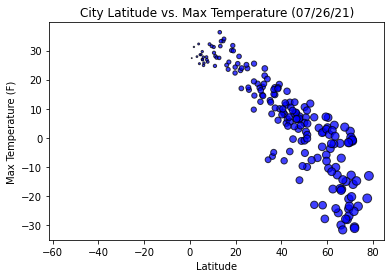

In [36]:
x_axis = new_weather_df["Lat"]
plt.scatter(x_axis, new_weather_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black",s=x_axis, alpha=0.75)
plt.title("City Latitude vs. Max Temperature (07/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

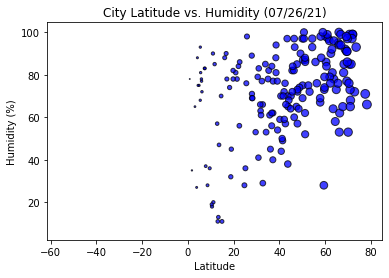

In [37]:
plt.scatter(x_axis, new_weather_df["Humidity"], marker="o", facecolors="blue", edgecolors="black",s=x_axis, alpha=0.75)
plt.title("City Latitude vs. Humidity (07/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

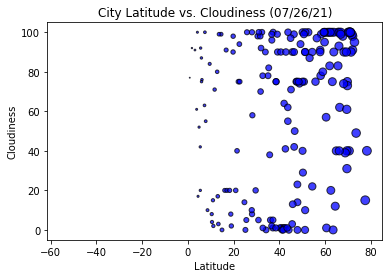

In [38]:
plt.scatter(x_axis, new_weather_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black",s=x_axis, alpha=0.75)
plt.title("City Latitude vs. Cloudiness (07/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

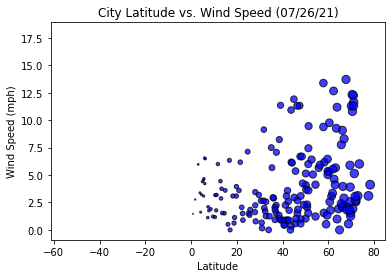

In [39]:
plt.scatter(x_axis, new_weather_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black",s=x_axis, alpha=0.75)
plt.title("City Latitude vs. Wind Speed (07/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [40]:
northern_weather_df = new_weather_df[new_weather_df.Lat >= 0]
southern_weather_df = new_weather_df[new_weather_df.Lat < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7758494455171268
The linear regression model is y = -0.72x + 36.97


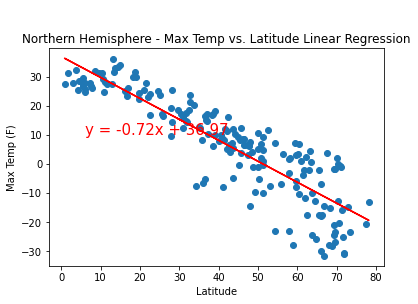

In [41]:
north_x = northern_weather_df["Lat"]
approx_north = []
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, northern_weather_df["Max Temp"])
#regress_values = weight * slope + intercept
for w in north_x:
    approx_north.append(w*slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x, northern_weather_df["Max Temp"])
plt.plot(north_x,approx_north,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print("The linear regression model is " + line_eq)
plt.savefig('north_temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.40079777532087113
The linear regression model is y = 0.33x + 29.68


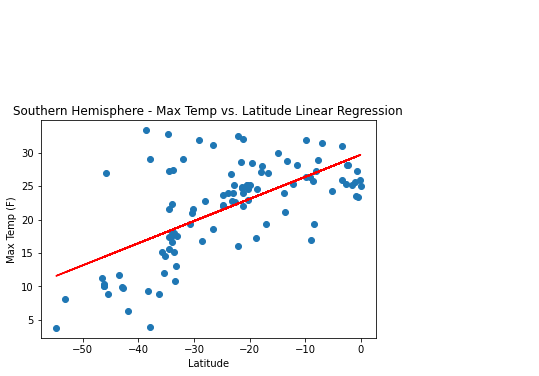

In [42]:
south_x = southern_weather_df["Lat"]
approx_south = []
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, southern_weather_df["Max Temp"])
#regress_values = weight * slope + intercept
for w in south_x:
    approx_south.append(w*slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x, southern_weather_df["Max Temp"])
plt.plot(south_x,approx_south,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print("The linear regression model is " + line_eq)
plt.savefig('south_temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16950347265561913
The linear regression model is y = 0.4x + 55.32


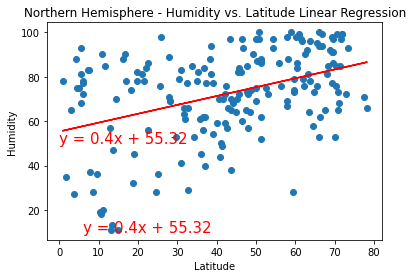

In [43]:
north_x = northern_weather_df["Lat"]
approx_north = []
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, northern_weather_df["Humidity"])
#regress_values = weight * slope + intercept
for w in north_x:
    approx_north.append(w*slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x, northern_weather_df["Humidity"])
plt.plot(north_x,approx_north,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print("The linear regression model is " + line_eq)
plt.savefig('north_hum.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006828521059504945
The linear regression model is y = 0.12x + 76.17


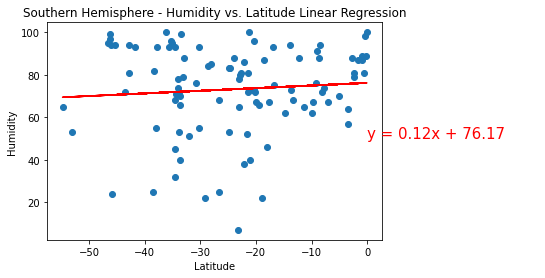

In [44]:
south_x = southern_weather_df["Lat"]
approx_south = []
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, southern_weather_df["Humidity"])
#regress_values = weight * slope + intercept
for w in south_x:
    approx_south.append(w*slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x, southern_weather_df["Humidity"])
plt.plot(south_x,approx_south,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print("The linear regression model is " + line_eq)
plt.savefig('south_hum.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05469505236912335
The linear regression model is y = 0.42x + 43.25


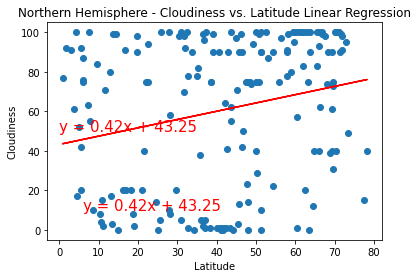

In [45]:
north_x = northern_weather_df["Lat"]
approx_north = []
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, northern_weather_df["Cloudiness"])
#regress_values = weight * slope + intercept
for w in north_x:
    approx_north.append(w*slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x, northern_weather_df["Cloudiness"])
plt.plot(north_x,approx_north,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print("The linear regression model is " + line_eq)
plt.savefig('north_cloud.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0041714279095039644
The linear regression model is y = 0.16x + 61.19


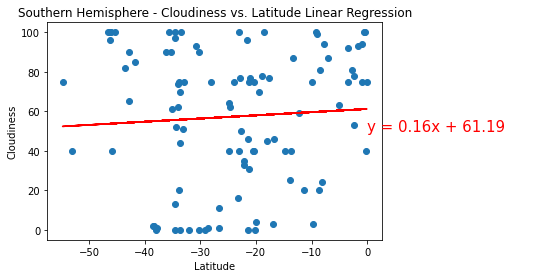

In [46]:
south_x = southern_weather_df["Lat"]
approx_south = []
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, southern_weather_df["Cloudiness"])
#regress_values = weight * slope + intercept
for w in south_x:
    approx_south.append(w*slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x, southern_weather_df["Cloudiness"])
plt.plot(south_x,approx_south,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print("The linear regression model is " + line_eq)
plt.savefig('south_cloud.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07601850712430097
The linear regression model is y = 0.04x + 2.14


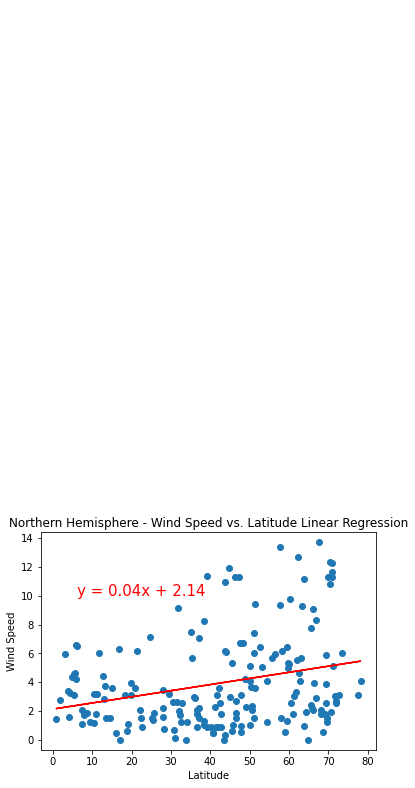

In [47]:
north_x = northern_weather_df["Lat"]
approx_north = []
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, northern_weather_df["Wind Speed"])
#regress_values = weight * slope + intercept
for w in north_x:
    approx_north.append(w*slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x, northern_weather_df["Wind Speed"])
plt.plot(north_x,approx_north,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print("The linear regression model is " + line_eq)
plt.savefig('north_wind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05496555387745825
The linear regression model is y = -0.05x + 2.58


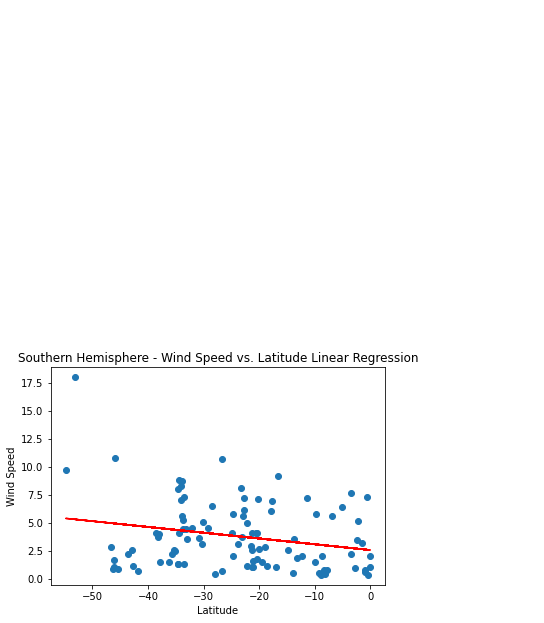

In [48]:
south_x = southern_weather_df["Lat"]
approx_south = []
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, southern_weather_df["Wind Speed"])
#regress_values = weight * slope + intercept
for w in south_x:
    approx_south.append(w*slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x, southern_weather_df["Wind Speed"])
plt.plot(south_x,approx_south,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print("The linear regression model is " + line_eq)
plt.savefig('south_wind.png')
plt.show()